In [26]:
## connect to snowflake using snowfalke connector
import snowflake.connector
import pandas as pd
conn = snowflake.connector.connect(
    account = "YWMSMUM-TK84405",
    user = "NEWPROFILE",
    password = "@Newprofile007",
    warehouse = "PROJECT_WAREHOUSE",
    database = "SALES_ANALYSIS_DB",
    schema = "PUBLIC"
)

#create a cursor object
cur = conn.cursor()




In [27]:
## fetch all tables in my snowflake database 

fact_sales = cur.execute("select * from fact_sales").fetch_pandas_all()
print(fact_sales.head())

   ORDERNO  ORDER_LINENO PRODUCT_CODE             CUSTOMER_NAME  ORDER_DATE  \
0    10107             2     S10_1678         Land of Toys Inc.  2003-02-24   
1    10121             5     S10_1678        Reims Collectables  2003-05-07   
2    10134             2     S10_1678           Lyon Souveniers  2003-07-01   
3    10145             6     S10_1678         Toys4GrownUps.com  2003-08-25   
4    10159            14     S10_1678  Corporate Gift Ideas Co.  2003-10-10   

    STATUS  QUANTITY_ORDER  PRICE_EACH    SALES  
0  Shipped              30       95.70  2871.00  
1  Shipped              34       81.35  2765.90  
2  Shipped              41       94.74  3884.34  
3  Shipped              45       83.26  3746.70  
4  Shipped              49      100.00  5205.27  


In [28]:
dim_products = cur.execute("select * from dim_products").fetch_pandas_all()
print(dim_products.head())

  PRODUCT_CODE  PRODUCT_LINE   MSRP DEAL_SIZE
0     S10_1678   Motorcycles   95.0     Large
1     S10_1949  Classic Cars  214.0    Medium
2     S10_4757  Classic Cars  136.0     Small
3     S12_1108  Classic Cars  207.0     Small
4     S12_2823   Motorcycles  150.0     Small


In [29]:
dim_date = cur.execute("select * from dim_date").fetch_pandas_all()
print(dim_date)

     ORDER_DATE  YEAR_ID  MONTH_ID  QTR_ID
0    2004-12-17     2004        12       4
1    2005-03-03     2005         3       1
2    2003-07-24     2003         7       3
3    2004-05-04     2004         5       2
4    2005-02-17     2005         2       1
..          ...      ...       ...     ...
242  2004-09-15     2004         9       3
243  2004-12-03     2004        12       4
244  2005-02-22     2005         2       1
245  2004-06-04     2004         6       2
246  2004-11-12     2004        11       4

[247 rows x 4 columns]


In [30]:
dim_customer = cur.execute("select * from dim_customer").fetch_pandas_all()
print(dim_customer)

                        CUSTOMER_NAME           PHONE  \
0                   Land of Toys Inc.      2125557818   
1                    Auto Canal Petit  (1) 47.55.6555   
2               UK Collectables, Ltd.  (171) 555-2282   
3              Saveley & Henriot, Co.      78.32.5555   
4                  Amica Models & Co.     011-4988555   
..                                ...             ...   
84  Royal Canadian Collectables, Ltd.  (604) 555-4555   
85               Marseille Mini Autos      91.24.4555   
86                  La Rochelle Gifts      40.67.8555   
87                 Signal Gift Stores      7025551838   
88            Auto-Moto Classics Inc.      6175558428   

                   ADDRESS_LINE1 ADDRESS_LINE2        CITY STATE POSTAL_CODE  \
0        897 Long Airport Avenue          None         NYC    NY       10022   
1              25, rue Lauriston          None       Paris  None       75016   
2   Berkeley Gardens 12  Brewery          None   Liverpool  None     WX1 6L

In [31]:
## to check the structure  and info of my tables 

for df, name in [(fact_sales, "Fact_Sales"), (dim_products, "Dim_Products"),
                 (dim_date, "Dim_Date"), (dim_customer, "Dim_Customer")]:
    print(f"\n{name} info:")
    display(df.info())
    display(df.head())



Fact_Sales info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ORDERNO         2749 non-null   int16  
 1   ORDER_LINENO    2749 non-null   int8   
 2   PRODUCT_CODE    2749 non-null   object 
 3   CUSTOMER_NAME   2749 non-null   object 
 4   ORDER_DATE      2749 non-null   object 
 5   STATUS          2749 non-null   object 
 6   QUANTITY_ORDER  2749 non-null   int8   
 7   PRICE_EACH      2749 non-null   float64
 8   SALES           2749 non-null   float64
dtypes: float64(2), int16(1), int8(2), object(4)
memory usage: 139.7+ KB


None

,ORDERNO,ORDER_LINENO,PRODUCT_CODE,CUSTOMER_NAME,ORDER_DATE,STATUS,QUANTITY_ORDER,PRICE_EACH,SALES
0,10107,2,S10_1678,Land of Toys Inc.,2003-02-24,Shipped,30,95.70,2871.00
1,10121,5,S10_1678,Reims Collectables,2003-05-07,Shipped,34,81.35,2765.90
2,10134,2,S10_1678,Lyon Souveniers,2003-07-01,Shipped,41,94.74,3884.34
3,10145,6,S10_1678,Toys4GrownUps.com,2003-08-25,Shipped,45,83.26,3746.70
4,10159,14,S10_1678,Corporate Gift Ideas Co.,2003-10-10,Shipped,49,100.00,5205.27



Dim_Products info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PRODUCT_CODE  265 non-null    object 
 1   PRODUCT_LINE  265 non-null    object 
 2   MSRP          265 non-null    float64
 3   DEAL_SIZE     265 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.4+ KB


None

,PRODUCT_CODE,PRODUCT_LINE,MSRP,DEAL_SIZE
0,S10_1678,Motorcycles,95.0,Large
1,S10_1949,Classic Cars,214.0,Medium
2,S10_4757,Classic Cars,136.0,Small
3,S12_1108,Classic Cars,207.0,Small
4,S12_2823,Motorcycles,150.0,Small



Dim_Date info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ORDER_DATE  247 non-null    object
 1   YEAR_ID     247 non-null    int16 
 2   MONTH_ID    247 non-null    int8  
 3   QTR_ID      247 non-null    int8  
dtypes: int16(1), int8(2), object(1)
memory usage: 3.0+ KB


None

,ORDER_DATE,YEAR_ID,MONTH_ID,QTR_ID
0,2004-12-17,2004,12,4
1,2005-03-03,2005,3,1
2,2003-07-24,2003,7,3
3,2004-05-04,2004,5,2
4,2005-02-17,2005,2,1



Dim_Customer info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_NAME       89 non-null     object
 1   PHONE               89 non-null     object
 2   ADDRESS_LINE1       89 non-null     object
 3   ADDRESS_LINE2       9 non-null      object
 4   CITY                89 non-null     object
 5   STATE               46 non-null     object
 6   POSTAL_CODE         86 non-null     object
 7   COUNTRY             89 non-null     object
 8   CONTACT_LAST_NAME   89 non-null     object
 9   CONTACT_FIRST_NAME  89 non-null     object
dtypes: object(10)
memory usage: 7.1+ KB


None

,CUSTOMER_NAME,PHONE,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COUNTRY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME
0,Land of Toys Inc.,2125557818,897 Long Airport Avenue,None,NYC,NY,10022,USA,Yu,Kwai
1,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",None,Paris,None,75016,France,Perrier,Dominique
2,"UK Collectables, Ltd.",(171) 555-2282,Berkeley Gardens 12 Brewery,None,Liverpool,None,WX1 6LT,UK,Devon,Elizabeth
3,"Saveley & Henriot, Co.",78.32.5555,"2, rue du Commerce",None,Lyon,None,69004,France,Saveley,Mary
4,Amica Models & Co.,011-4988555,Via Monte Bianco 34,None,Torino,None,10100,Italy,Accorti,Paolo


In [32]:
print(fact_sales.isnull().sum())

ORDERNO           0
ORDER_LINENO      0
PRODUCT_CODE      0
CUSTOMER_NAME     0
ORDER_DATE        0
STATUS            0
QUANTITY_ORDER    0
PRICE_EACH        0
SALES             0
dtype: int64


In [33]:
print(dim_products.isnull().sum())

PRODUCT_CODE    0
PRODUCT_LINE    0
MSRP            0
DEAL_SIZE       0
dtype: int64


In [34]:
print(dim_date.isnull().sum())

ORDER_DATE    0
YEAR_ID       0
MONTH_ID      0
QTR_ID        0
dtype: int64


In [35]:
print(dim_customer.isnull().sum())

CUSTOMER_NAME          0
PHONE                  0
ADDRESS_LINE1          0
ADDRESS_LINE2         80
CITY                   0
STATE                 43
POSTAL_CODE            3
COUNTRY                0
CONTACT_LAST_NAME      0
CONTACT_FIRST_NAME     0
dtype: int64


In [36]:
## handling null values

dim_customer['ADDRESS_LINE2'] = dim_customer['ADDRESS_LINE2'].fillna('N/A')
dim_customer['STATE'] = dim_customer['STATE'].fillna('N/A')
dim_customer['POSTAL_CODE'] = dim_customer['POSTAL_CODE'].fillna('N/A')
print(dim_customer.isnull().sum())


CUSTOMER_NAME         0
PHONE                 0
ADDRESS_LINE1         0
ADDRESS_LINE2         0
CITY                  0
STATE                 0
POSTAL_CODE           0
COUNTRY               0
CONTACT_LAST_NAME     0
CONTACT_FIRST_NAME    0
dtype: int64


In [37]:
## drop duplicates 

fact_sales.drop_duplicates(inplace = True)
dim_date.drop_duplicates(inplace = True)
dim_customer.drop_duplicates(inplace = True)
dim_products.drop_duplicates(inplace = True)




In [38]:
dim_customer


,CUSTOMER_NAME,PHONE,ADDRESS_LINE1,ADDRESS_LINE2,CITY,STATE,POSTAL_CODE,COUNTRY,CONTACT_LAST_NAME,CONTACT_FIRST_NAME
0,Land of Toys Inc.,2125557818,897 Long Airport Avenue,N/A,NYC,NY,10022,USA,Yu,Kwai
1,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",N/A,Paris,N/A,75016,France,Perrier,Dominique
2,"UK Collectables, Ltd.",(171) 555-2282,Berkeley Gardens 12 Brewery,N/A,Liverpool,N/A,WX1 6LT,UK,Devon,Elizabeth
3,"Saveley & Henriot, Co.",78.32.5555,"2, rue du Commerce",N/A,Lyon,N/A,69004,France,Saveley,Mary
4,Amica Models & Co.,011-4988555,Via Monte Bianco 34,N/A,Torino,N/A,10100,Italy,Accorti,Paolo
...,...,...,...,...,...,...,...,...,...,...
84,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,N/A,Tsawassen,BC,T2F 8M4,Canada,Lincoln,Elizabeth
85,Marseille Mini Autos,91.24.4555,"12, rue des Bouchers",N/A,Marseille,N/A,13008,France,Lebihan,Laurence
86,La Rochelle Gifts,40.67.8555,"67, rue des Cinquante Otages",N/A,Nantes,N/A,44000,France,Labrune,Janine
87,Signal Gift Stores,7025551838,8489 Strong St.,N/A,Las Vegas,NV,83030,USA,King,Sue


In [53]:
## change datatype of some columns 

dim_date['ORDER_DATE'] = pd.to_datetime(dim_date['ORDER_DATE'] , errors = 'coerce')
print(dim_date.info())

## NOW IN FACT TABLE
fact_sales['ORDER_DATE'] = pd.to_datetime(fact_sales['ORDER_DATE'])
print(fact_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ORDER_DATE  247 non-null    datetime64[ns]
 1   YEAR_ID     247 non-null    int16         
 2   MONTH_ID    247 non-null    int8          
 3   QTR_ID      247 non-null    int8          
 4   Order_Date  247 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int16(1), int8(2)
memory usage: 5.0 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749 entries, 0 to 2748
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ORDERNO         2749 non-null   int16         
 1   ORDER_LINENO    2749 non-null   int8          
 2   PRODUCT_CODE    2749 non-null   object        
 3   CUSTOMER_NAME   2749 non-null   object        
 4   ORDER_DATE      2749 non-null   datetime64[ns]
 5   STATUS        

In [54]:
## JOIN ALL THE TABLES TO PERFORM ANALYSIS

sales_data = ( fact_sales.merge(dim_customer , on = 'CUSTOMER_NAME' , how = 'left')
    .merge(dim_products , left_on = 'PRODUCT_CODE' , right_on = 'PRODUCT_CODE', how = 'left')
    .merge(dim_date , on = 'ORDER_DATE' , how = 'left'))

print(sales_data)

      ORDERNO  ORDER_LINENO PRODUCT_CODE          CUSTOMER_NAME ORDER_DATE  \
0       10107             2     S10_1678      Land of Toys Inc. 2003-02-24   
1       10107             2     S10_1678      Land of Toys Inc. 2003-02-24   
2       10107             2     S10_1678      Land of Toys Inc. 2003-02-24   
3       10121             5     S10_1678     Reims Collectables 2003-05-07   
4       10121             5     S10_1678     Reims Collectables 2003-05-07   
...       ...           ...          ...                    ...        ...   
6698    10386             4     S72_3212  Euro Shopping Channel 2005-03-01   
6699    10397             1     S72_3212           Alpha Cognac 2005-03-28   
6700    10397             1     S72_3212           Alpha Cognac 2005-03-28   
6701    10414             9     S72_3212      Gifts4AllAges.com 2005-05-06   
6702    10414             9     S72_3212      Gifts4AllAges.com 2005-05-06   

        STATUS  QUANTITY_ORDER  PRICE_EACH    SALES           P

In [56]:
sales_data.to_csv("clean_sales_data.csv" , index = False)

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

In [60]:
## covert all the column in lower 

sales_data.columns = sales_data.columns.str.lower()


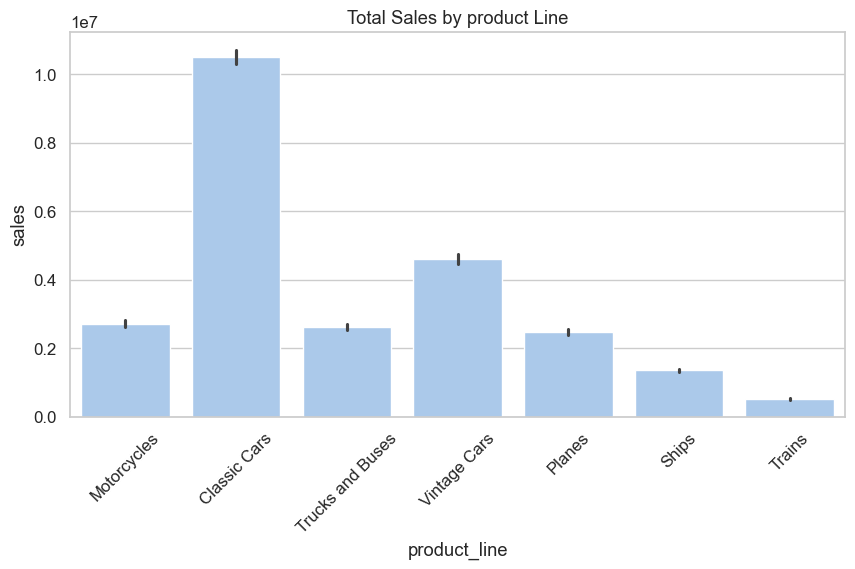

In [63]:
## total sales by productline 

plt.figure(figsize=(10,5))
sns.barplot(x='product_line', y='sales', data=sales_data, estimator=sum)
plt.title('Total Sales by product Line')
plt.xticks(rotation=45)
plt.show()


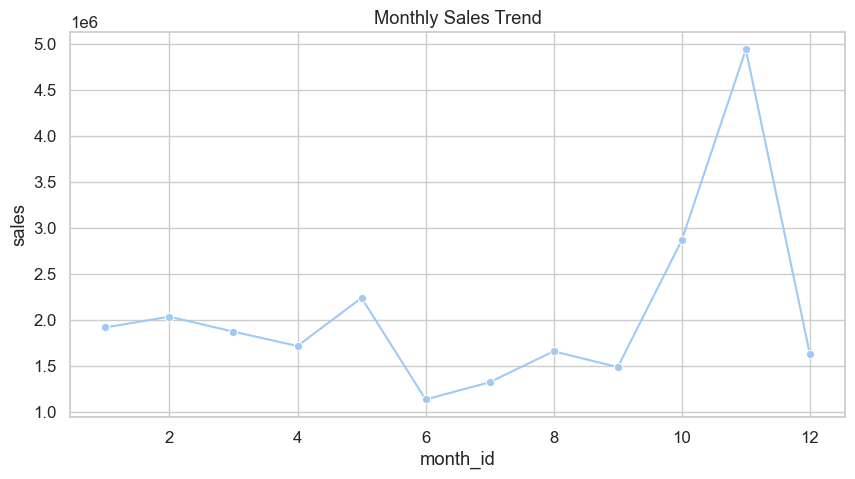

In [64]:
## Monthly sales trend

monthly_sales = sales_data.groupby('month_id')['sales'].sum().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='month_id', y='sales', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.show()


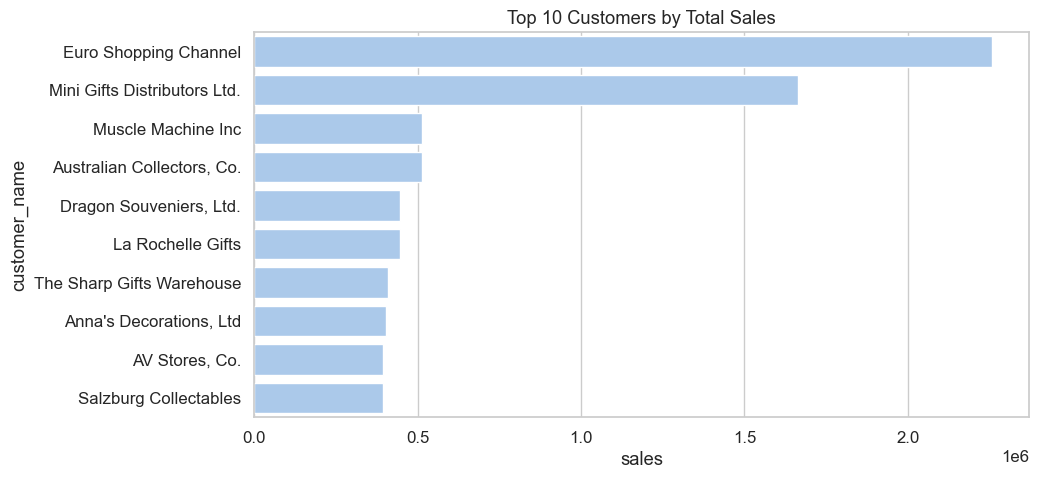

In [67]:
## top 10 customers by total sales 

top_customers = sales_data.groupby('customer_name')['sales'].sum().nlargest(10).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='sales', y='customer_name', data=top_customers)
plt.title('Top 10 Customers by Total Sales')
plt.show()


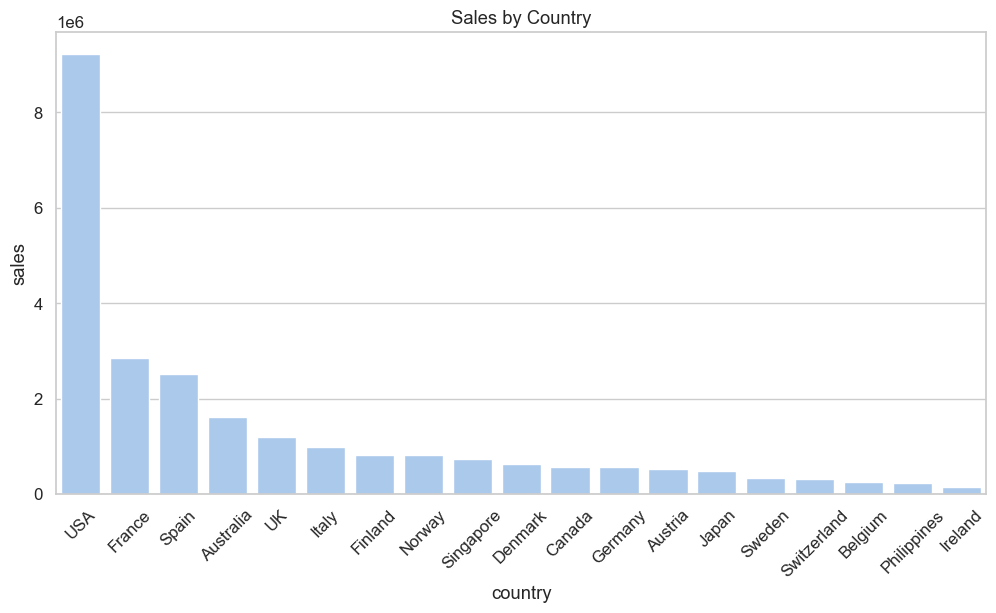

In [65]:
## Sales by country 

plt.figure(figsize=(12,6))
country_sales = sales_data.groupby('country')['sales'].sum().reset_index().sort_values(by='sales', ascending=False)
sns.barplot(x='country', y='sales', data=country_sales)
plt.title('Sales by Country')
plt.xticks(rotation=45)
plt.show()


In [1]:
import os
os.getcwd()


'C:\\Users\\Dell\\projects'